In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-chunk/Churn_Modelling.csv


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset = pd.read_csv('../input/bank-chunk/Churn_Modelling.csv')

In [7]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [8]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

In [10]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [13]:
# Part 2 - Now let's make the ANN!

In [14]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [15]:
# Initialising the ANN
classifier = Sequential()

In [16]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_normal',activation='relu',input_dim = 11))

In [17]:
# Adding the second hidden layer
classifier.add(Dense(units = 20, kernel_initializer = 'he_normal',activation='relu'))

In [18]:
# Adding the third hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'he_normal',activation='relu'))

In [19]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_normal', activation = 'sigmoid'))

In [20]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10,epochs=100)

Epoch 1/100
536/536 [==============================] - 4s 5ms/step - loss: 0.4739 - accuracy: 0.7946 - val_loss: 0.4590 - val_accuracy: 0.8005
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4364 - accuracy: 0.8061 - val_loss: 0.4448 - val_accuracy: 0.8001
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4237 - accuracy: 0.8127 - val_loss: 0.4351 - val_accuracy: 0.8088
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4142 - accuracy: 0.8212 - val_loss: 0.4279 - val_accuracy: 0.8084
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4043 - accuracy: 0.8302 - val_loss: 0.4242 - val_accuracy: 0.8141
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3965 - accuracy: 0.8317 - val_loss: 0.4153 - val_accuracy: 0.8175
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3885 - accuracy: 0.8350 - val_loss: 0.4159 - val_accuracy: 0.8194

In [22]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


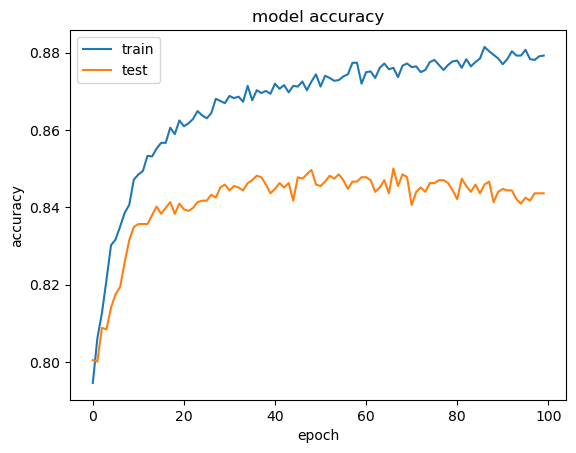

In [23]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

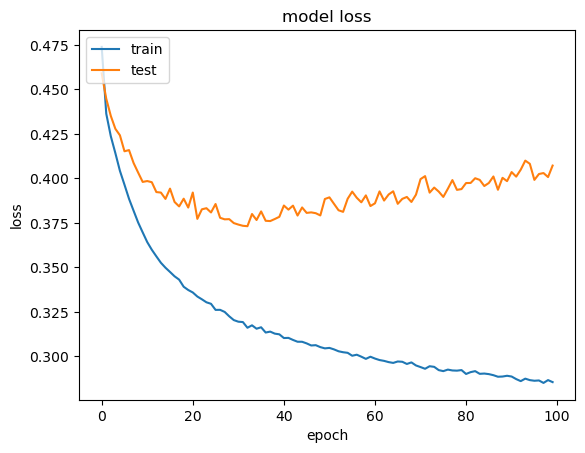

In [24]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
# Part 3 - Making the predictions and evaluating the model

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1469  126]
 [ 176  229]]


In [32]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test,normalize=True)
print(score)

0.849
